# Scaling / Timing Analysis

## Setup

Load Python, R, etc.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## Load the data

In [3]:
timings = pd.read_csv('build/timing.csv')
timings

,dataset,mptype,threads,mkl_threads,run,time
0,ml-1m,openmp,1,1,0,29.134678
1,ml-1m,openmp,1,1,1,25.369593
2,ml-1m,openmp,1,1,2,25.185158
3,ml-1m,openmp,1,1,3,25.270815
4,ml-1m,openmp,1,1,4,25.238978
5,ml-1m,openmp,1,2,0,33.658338
6,ml-1m,openmp,1,2,1,31.048858
7,ml-1m,openmp,1,2,2,31.151567
8,ml-1m,openmp,1,2,3,31.059412
9,ml-1m,openmp,1,2,4,30.958797


Extract the sequential timings:

In [4]:
seq_time = timings[timings.mptype == 'seq']
omp_time = timings[timings.mptype == 'openmp'].copy()

In [5]:
seq_time.time.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: time, dtype: float64

In [6]:
mean_seq = seq_time.groupby('dataset').time.mean()
mean_seq

Series([], Name: time, dtype: float64)

In [7]:
omp_time = omp_time.set_index(['dataset', 'threads', 'run']).assign(adj_time = lambda df: mean_seq / df.time).reset_index()
omp_time.head()

,dataset,threads,run,mptype,mkl_threads,time,adj_time
0,ml-1m,1,0,openmp,1,29.134678,NaN
1,ml-1m,1,1,openmp,1,25.369593,NaN
2,ml-1m,1,2,openmp,1,25.185158,NaN
3,ml-1m,1,3,openmp,1,25.270815,NaN
4,ml-1m,1,4,openmp,1,25.238978,NaN


## Plot OpenMP speedups

In [8]:
omp_means = omp_time[omp_time.threads.notna()].groupby(['dataset', 'threads', 'mkl_threads']).time.agg(['mean', 'min', 'max']).reset_index()
omp_means

,dataset,threads,mkl_threads,mean,min,max
0,ml-1m,1,1,26.039845,25.185158,29.134678
1,ml-1m,1,2,31.575394,30.958797,33.658338
2,ml-1m,1,4,30.726243,30.014985,32.664813
3,ml-1m,1,8,35.267601,34.276869,36.053693
4,ml-1m,2,1,30.884238,30.157116,32.796810
5,ml-1m,2,2,37.602795,37.055534,39.554063
6,ml-1m,2,4,35.845755,35.250760,37.707268
7,ml-1m,2,8,42.699975,41.876770,44.981109
8,ml-1m,4,1,30.328788,29.670078,32.813843
9,ml-1m,4,2,42.612214,41.764381,43.282765


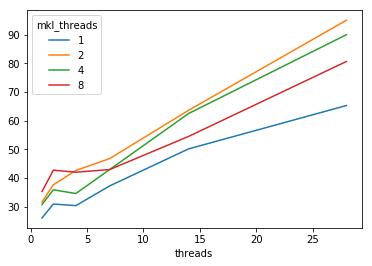

In [9]:
rdf = omp_means.pivot(index='threads', columns='mkl_threads', values='mean')
rdf.plot()

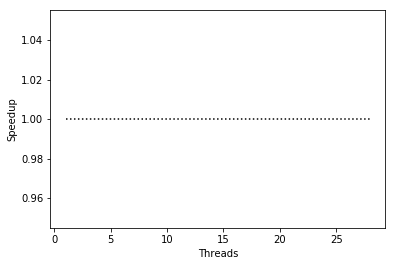

In [10]:
fig, ax = plt.subplots()
# omp_means[omp_means.dataset == 'ml-100k'].plot.scatter(x='threads', y='mean', color='blue', label='ML100K', ax=ax)
# omp_means[omp_means.dataset == 'ml-1m'].plot.scatter(x='threads', y='mean', color='red', label='ML1M', ax=ax)
ax.set_xlabel('Threads')
ax.set_ylabel('Speedup')
plt.hlines(1, omp_means.threads.min(), omp_means.threads.max(), linestyles='dotted')
plt.show()